Kaggle Competition: https://www.kaggle.com/competitions/playground-series-s3e24/overview

Dataset feature reference:
<br>**age** : 5-years gap 
<br>**height(cm)**
<br>**weight(kg)**
<br>**waist(cm)** : Waist circumference length
<br>**eyesight(left)**: Above 1.0 is considered "good" 
<br>**eyesight(right)**
<br>**hearing(left)**: No good documentation for context
<br>**hearing(right)**
<br>**systolic** : Blood pressure. 120 or below is "normal"
<br>**relaxation** : Blood pressure. 80 or below is "normal"
<br>**fasting blood sugar***: 100 and below is "normal"
<br>**Cholesterol** : total. 200 and below is "normal". 240 is "high"
<br>**triglyceride**: 150 and below is "normal". 200 is "high"
<br>**HDL** : "good" cholesterol type. 60 and above is "normal"
<br>**LDL** : "bad" cholesterol type. 100 and below is "normal"
<br>**hemoglobin**: Depends on sex. females: 12-16 is "normal"
                                    males: 14-16 is "normal"
<br>**Urine protein**: No good documentation for context. Low feature variance
<br>**serum creatinine**: depends on sex. females: 0.95 and below is normal. 
                                          males: 1.17 and below is normal
<br>**AST** : glutamic oxaloacetic transaminase type. 8-48 is "normal"
<br>**ALT** : glutamic oxaloacetic transaminase type. 7-55 is "normal"
<br>**Gtp** : γ-GTP. Depends on sex. females: 38 and below is "normal"
                                     males: 55 and below is "normal"
<br>**dental caries**: Tooth decay/cavities found. 1 = True; 0 = False
<br>**smoking**: 1 = True; 0 = False

## Data exploration

In [100]:
%run Utility.ipynb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [101]:
print(train.shape)
train.head()

(159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [102]:
print(test.shape)
test.head()

(106171, 23)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [103]:
check_missing_data(train)
check_missing_data(test)

No missing data found.
No missing data found.


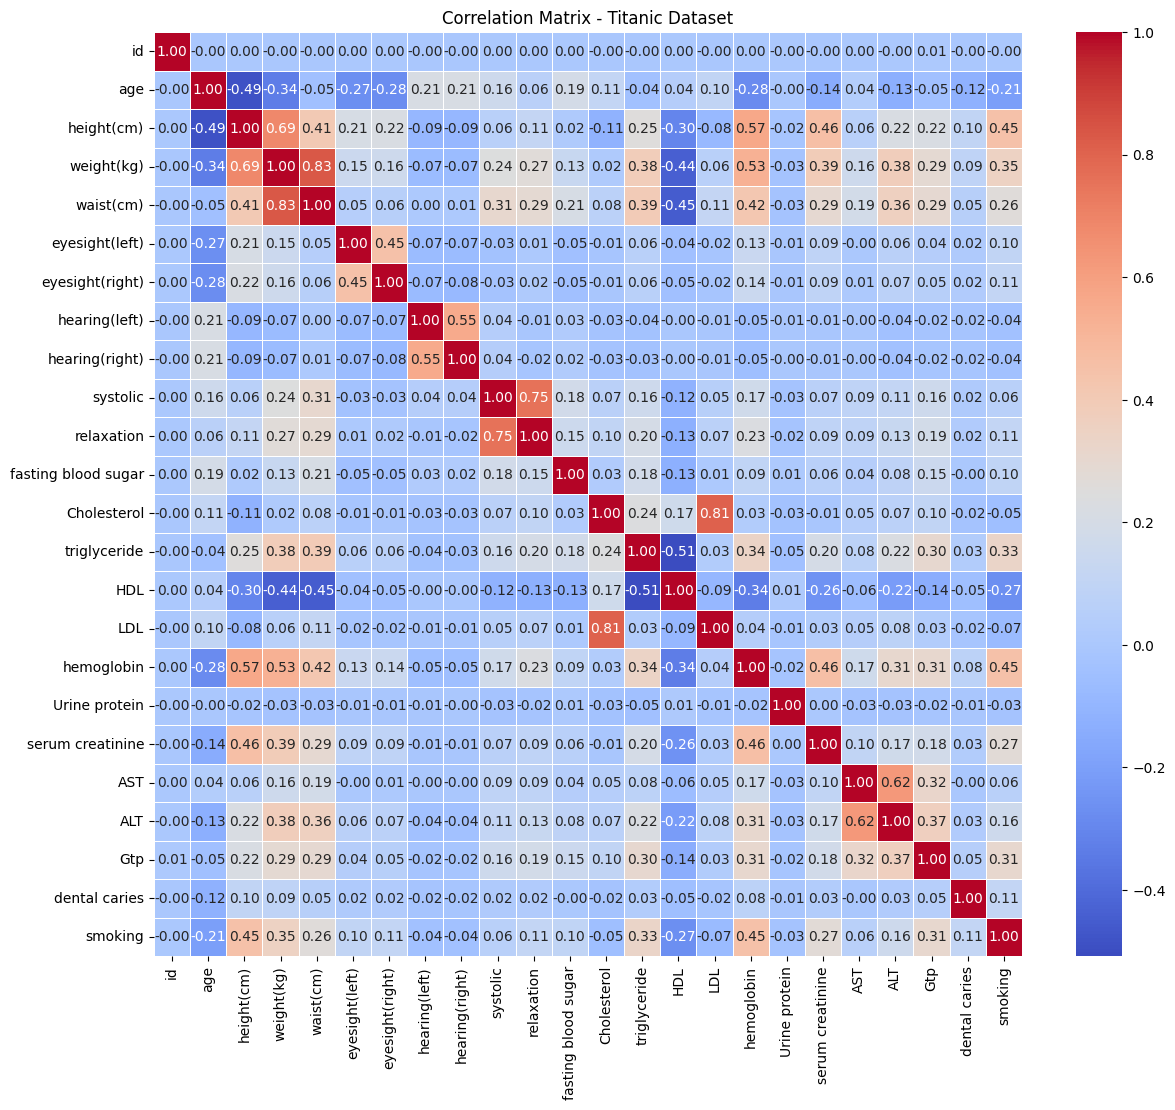

In [104]:
draw_correlation_matrix(train)

In [105]:
print_unique_values(train, 'Urine protein')

Unique values in column 'Urine protein':
[1 3 2 4 5 6]


In [106]:
print_unique_values(train, 'serum creatinine')

Unique values in column 'serum creatinine':
[1.  1.1 0.8 0.7 0.9 1.3 1.2 0.5 0.4 0.6 1.4 1.6 1.5 1.7 0.1 1.8 2.5 3.
 1.9 0.2 2.2 2.1 5.9 0.3 2.  3.4 9.9 7.4]


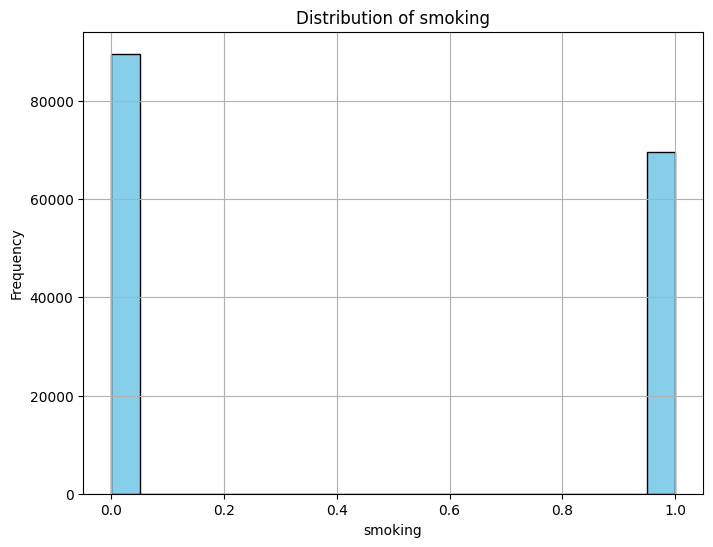

In [107]:
display_col_distribution(train, 'smoking')

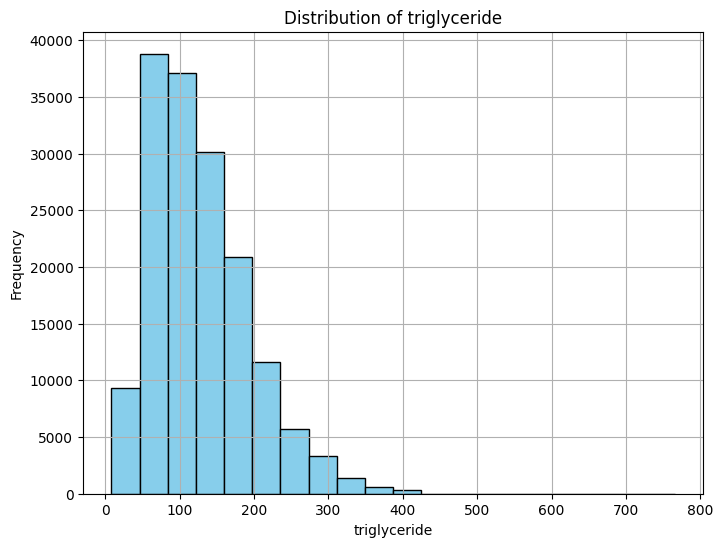

In [108]:
display_col_distribution(train, 'triglyceride')

In [109]:
get_column_value_statistics(train, 'triglyceride')

triglyceride stats:
Statistic      Value
mean         127.616
std           66.189
min            8
5%            44
25%           77
50%          115
75%          165
90%          216
95%          255
99%          329
max          766


In [110]:
print_outliers(train, 'serum creatinine')

Outliers in column 'serum creatinine':
[3.0, 5.9, 5.9, 3.4, 9.9, 7.4]


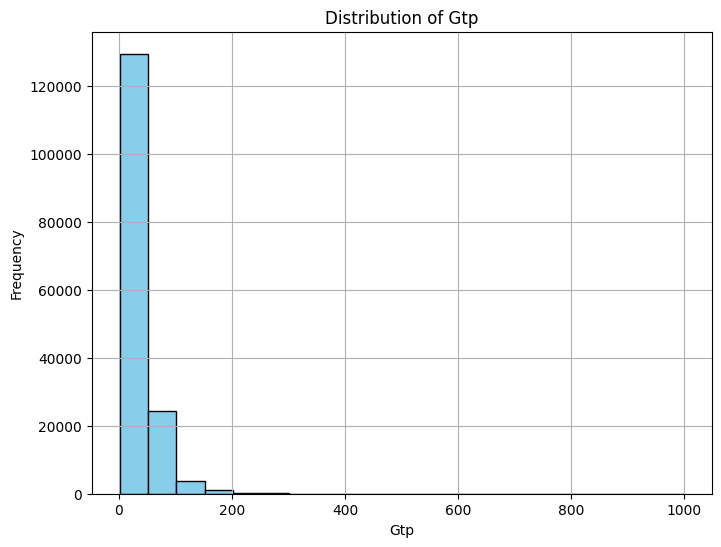

In [111]:
display_col_distribution(train, 'Gtp')

#Most utility functions can be looped over each column like below
# for column in train.columns:
#     display_col_distribution(train, column)

In [112]:
get_column_value_statistics(train, 'Gtp')

Gtp stats:
Statistic       Value
mean          36.216
std           31.2046
min            2
5%            12
25%           18
50%           27
75%           44
90%           66
95%           88
99%          152
max          999


WINSORIZE LIST: AST, ALT, 

In [113]:
print_outliers(train, 'Gtp')

Outliers in column 'Gtp':
[479, 484, 483, 371, 479, 484, 364, 371, 468, 446, 325, 566, 559, 764, 315, 663, 590, 766, 364, 398, 590, 553, 306, 514, 999, 446, 559, 479, 487, 368, 368, 318, 778, 487, 311, 589, 355, 430, 391, 342, 399, 446, 446, 317, 667, 582, 342, 325, 317, 395, 317, 559, 371, 764, 376, 567, 371, 364, 487, 573, 483, 307, 328, 691, 490, 321, 306, 342, 926, 347, 364, 778, 372, 522, 430, 357, 479, 357, 506, 836, 461, 430, 315, 567, 327, 342, 311, 816, 487, 392, 347, 307, 321, 432, 310, 479, 347, 521, 371, 306, 442, 442, 488, 483, 364, 637, 436, 566, 371, 371, 318, 334, 318, 342, 483, 370, 342, 484, 376, 752, 545, 321, 461, 568, 752, 446, 521, 317, 487, 370, 376, 418, 391, 319, 430, 316, 468, 483, 321, 483, 484, 340, 325, 691, 446, 325, 637, 634, 484, 481, 317, 307, 329, 407, 346, 437, 342, 371, 316, 307, 553, 314, 442, 551, 484, 316, 320, 364, 568, 567]


## Data cleaning

In [114]:
def clean_data(data):
    dataframe = data.copy()
    
    
    patient_id = dataframe['id']
    
    #Get rid of outliers
    dataframe = winsorize_outliers(dataframe, 'Gtp')
    print_outliers(train, 'Gtp')
    
    dataframe = winsorize_outliers(dataframe, 'AST')
    print_outliers(train, 'AST')

    dataframe = winsorize_outliers(dataframe, 'ALT')
    print_outliers(train, 'ALT')

    #winsorize2 only winsorizes above .99 percent
    dataframe = winsorize2_outliers(dataframe, 'LDL')
    dataframe = winsorize2_outliers(dataframe, 'serum creatinine')
    dataframe = winsorize2_outliers(dataframe, 'fasting blood sugar')
    
    #Discretize column into bins
    dataframe = discretize_column(dataframe, 'Cholesterol', [200, 240], [0, 1, 2])
    
    #Remove Unnecessary columns
    dataframe = dataframe.drop(columns = ['id', 'Urine protein', 'hearing(left)', 'hearing(right)',
                                          'eyesight(left)', 'eyesight(right)'])
    
    '''
    What else to look at (ChatGPT is your friend for anything you don't know how to do already):
    -Remove other low correlation or useless columns
    -Read into what factors smoking impacts and discretize those features to make their impact 
     more noticable
    -Instead of deleting rows with outliers, trying another method: (Winsorizing, Clipping, imputation)
    '''
    
    
    return dataframe, patient_id

train = pd.read_csv("train.csv")
train, patient_id = clean_data(train)

train.head()

Outliers in column 'Gtp':
[479, 484, 483, 371, 479, 484, 364, 371, 468, 446, 325, 566, 559, 764, 315, 663, 590, 766, 364, 398, 590, 553, 306, 514, 999, 446, 559, 479, 487, 368, 368, 318, 778, 487, 311, 589, 355, 430, 391, 342, 399, 446, 446, 317, 667, 582, 342, 325, 317, 395, 317, 559, 371, 764, 376, 567, 371, 364, 487, 573, 483, 307, 328, 691, 490, 321, 306, 342, 926, 347, 364, 778, 372, 522, 430, 357, 479, 357, 506, 836, 461, 430, 315, 567, 327, 342, 311, 816, 487, 392, 347, 307, 321, 432, 310, 479, 347, 521, 371, 306, 442, 442, 488, 483, 364, 637, 436, 566, 371, 371, 318, 334, 318, 342, 483, 370, 342, 484, 376, 752, 545, 321, 461, 568, 752, 446, 521, 317, 487, 370, 376, 418, 391, 319, 430, 316, 468, 483, 321, 483, 484, 340, 325, 691, 446, 325, 637, 634, 484, 481, 317, 307, 329, 407, 346, 437, 342, 371, 316, 307, 553, 314, 442, 551, 484, 316, 320, 364, 568, 567]
Outliers in column 'AST':
[129, 124, 320, 127, 187, 216, 136, 120, 136, 134, 166, 142, 326, 126, 135, 527, 134, 120, 162, 3

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,135,87,94,0,300,40,75,16.5,1.0,22,25,27,0,1
1,70,165,65,89.0,146,83,147,0,55,57,126,16.2,1.1,27,23,37,1,0
2,20,170,75,81.0,118,75,79,0,197,45,93,17.4,0.8,27,31,53,0,1
3,35,180,95,105.0,131,88,91,0,203,38,102,15.9,1.0,20,27,30,1,0
4,30,165,60,80.5,121,76,91,0,87,44,93,15.4,0.8,19,13,17,0,1


## Models

In [115]:
y = train['smoking']
X = train.drop(columns = ["smoking"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify ?

In [116]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Accuracy: {accuracy}')
print(f'\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.7727301268366193

Confusion Matrix:
[[13278  4505]
 [ 2734 11335]]


In [117]:
'''
Other things to try: (ChatGBT is your friend!)
-Mess around with model parameters (grid search can be helpful)
-Try other models: random forest, GradientBoostingClassifier (GBC), 
 Neural Network (not recommended due to difficulty, but could be fun)
'''

'\nOther things to try: (ChatGBT is your friend!)\n-Mess around with model parameters (grid search can be helpful)\n-Try other models: random forest, GradientBoostingClassifier (GBC), \n Neural Network (not recommended due to difficulty, but could be fun)\n'

## Generate Output File

In [118]:
X_output = pd.read_csv("test.csv")
X_output, patient_id = clean_data(X_output)

X_output.head()

Outliers in column 'Gtp':
[]
Outliers in column 'AST':
[]
Outliers in column 'ALT':
[]


,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,130,89,107,1,186,49,115,14.2,0.9,19,25,32,0
1,80,160,60,93.0,144,72,93,0,158,35,104,13.0,1.1,20,12,24,0
2,60,170,70,86.5,117,75,92,0,173,39,88,15.4,1.3,38,60,36,0
3,40,160,50,67.0,116,62,91,1,47,75,128,14.5,0.6,25,18,11,1
4,40,170,75,89.4,132,94,79,0,100,39,123,16.5,1.0,30,39,27,1


In [119]:
y_pred = model.predict(X_output)

output_data = pd.DataFrame({'id': patient_id, 'class': y_pred})
output_data.to_csv('output_file_random.csv', index=False)